In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Calculating the no. of zeros in so called variables

In [6]:
print(df['Glucose'].value_counts()[0])

5


In [7]:
print(df['BloodPressure'].value_counts()[0])

35


In [8]:
print(df['SkinThickness'].value_counts()[0])

227


In [9]:
print(df['Insulin'].value_counts()[0])

374


In [10]:
print(df['BMI'].value_counts()[0])

11


# Replacing Zeros with Nan

In [11]:
from numpy import nan

In [12]:
df[['Glucose']]=df[['Glucose']].replace(0,nan)

In [13]:
df[['BloodPressure']]=df[['BloodPressure']].replace(0,nan)

In [14]:
df[['SkinThickness']]=df[['SkinThickness']].replace(0,nan)

In [15]:
df[['Insulin']]=df[['Insulin']].replace(0,nan)

In [16]:
df[['BMI']]=df[['BMI']].replace(0,nan)

In [17]:
df.dropna(subset=["Glucose"],inplace=True)

# Checking the distribution of data for each variables

(array([  3.,   2.,  34., 118., 224., 212., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

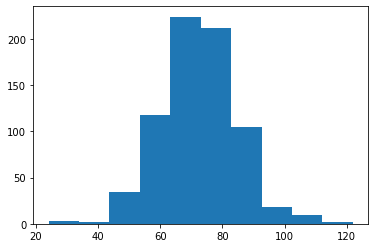

In [18]:
plt.hist(df['BloodPressure'])

(array([ 52., 159., 195., 193.,  89.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

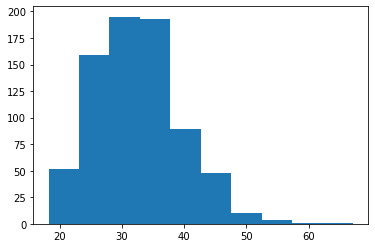

In [19]:
plt.hist(df['BMI'])

(array([ 59., 139., 180., 116.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

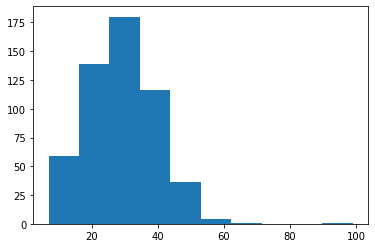

In [20]:
plt.hist(df['SkinThickness'])

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


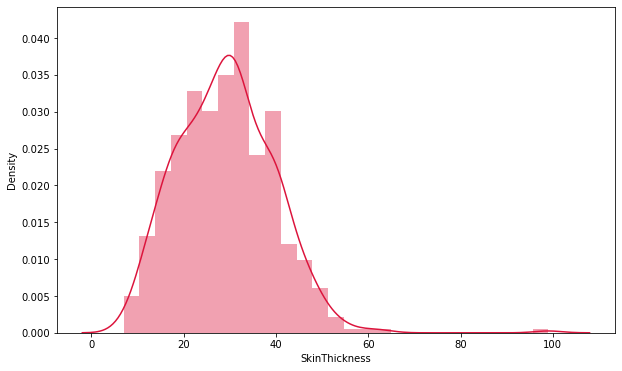

In [21]:
plt.figure(figsize = (10,6))
sns.distplot(df['SkinThickness'], color = 'crimson', hist = True)
plt.show()



(array([141., 143.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

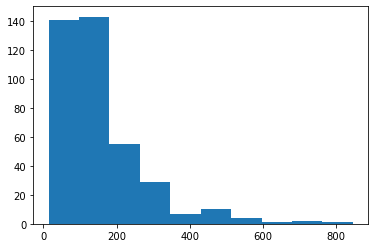

In [22]:
plt.hist(df['Insulin'])

# Replacing the nan value with mean and median

In [23]:
a=df["SkinThickness"].median()
print(a)
df["SkinThickness"].fillna(a,inplace=True)

29.0


In [24]:
b=df["Insulin"].median()
print(b)
df["Insulin"].fillna(b,inplace=True)

125.0


In [25]:
c=df["BloodPressure"].mean()
print(c)
df["BloodPressure"].fillna(c,inplace=True)

72.43818681318682


In [26]:
d=df["BMI"].median()
print(d)
df["BMI"].fillna(d,inplace=True)

32.3


# Exploratory data analysis

<AxesSubplot:xlabel='Outcome', ylabel='count'>

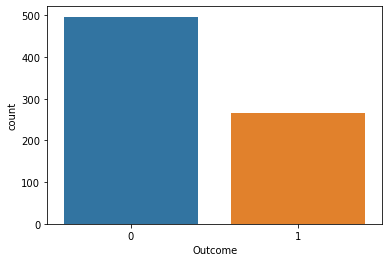

In [27]:
sns.countplot(x ='Outcome', data = df)

There is no much difference between positive and negetive values. So no need to use over-sampling method.

Checking the corelations between the variables 

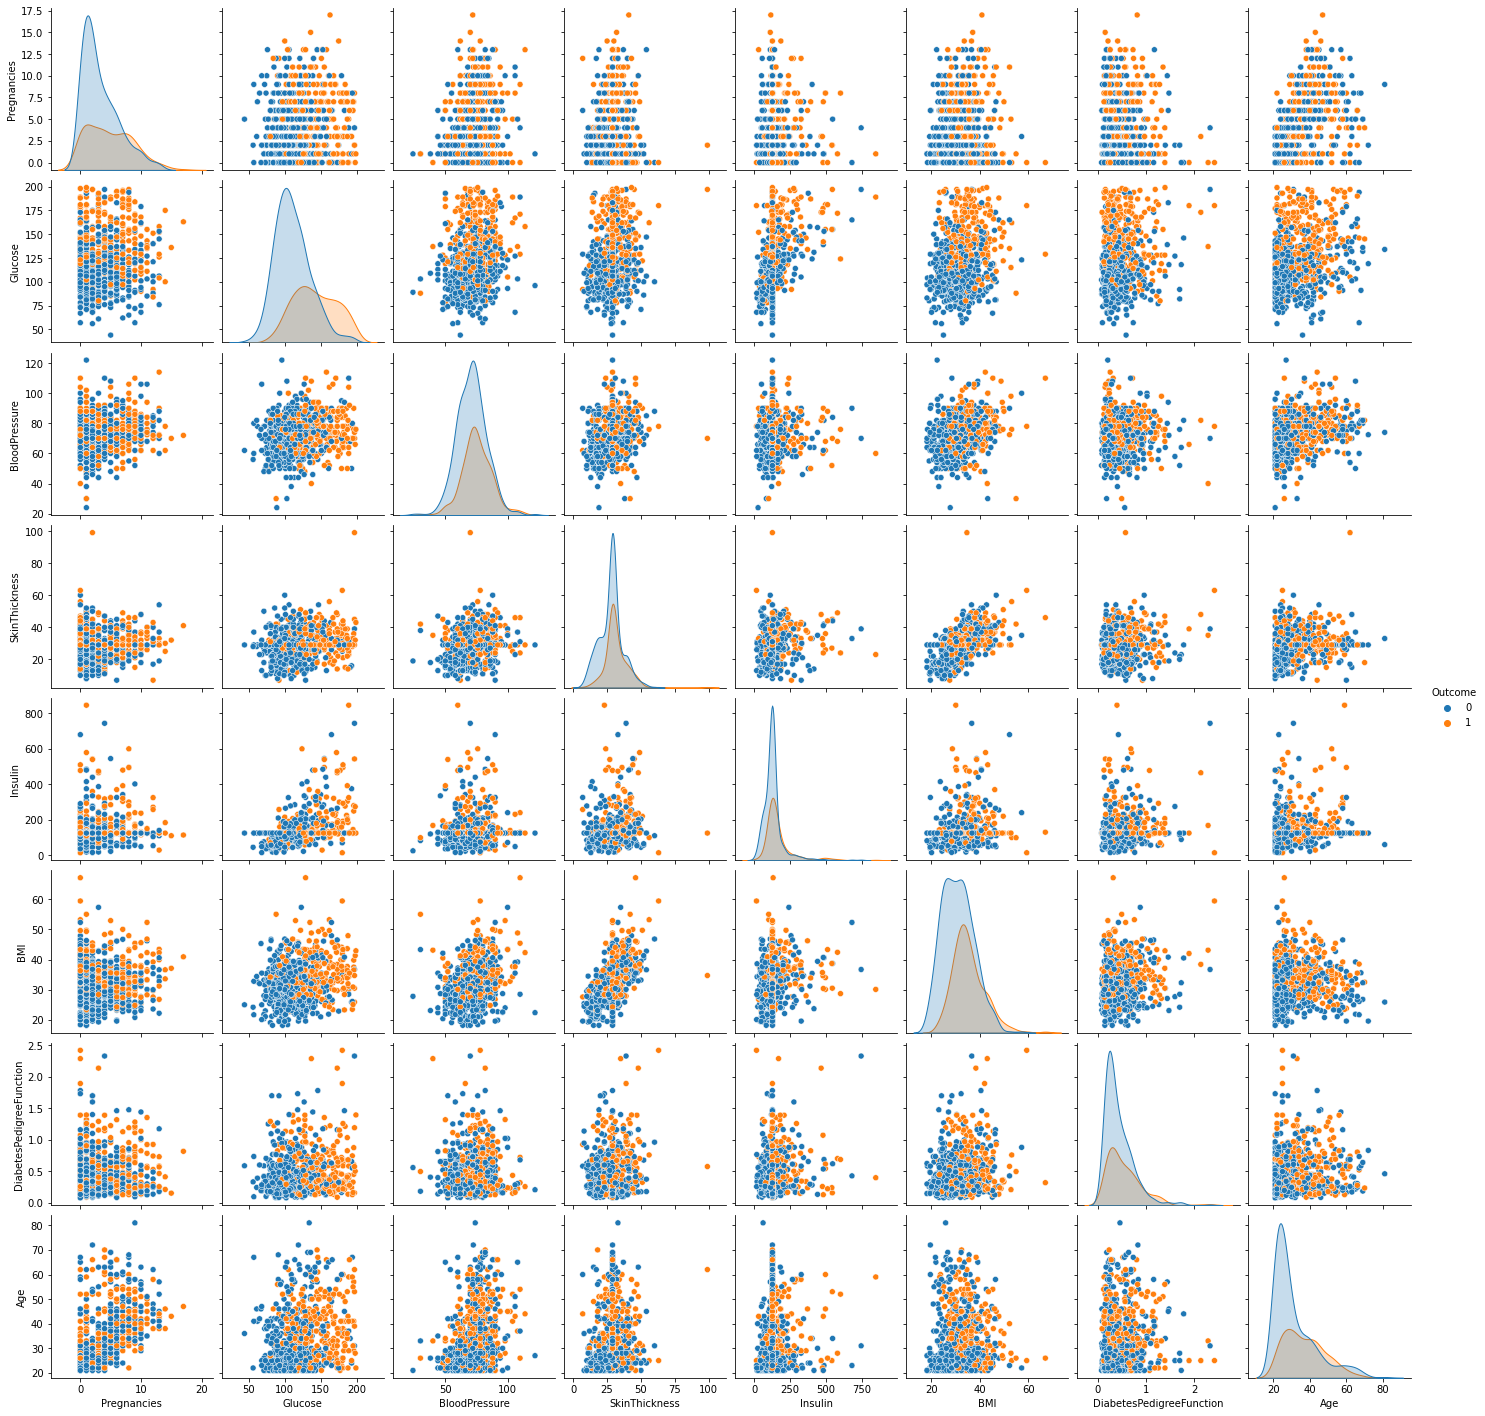

In [28]:
sns.pairplot(df,hue='Outcome')

Here there is overlapping between variables so here is no linear classification and in most of the cases there is no multicolinearity. but there is slight positive colinearity in between skin thickness and BMI.Let check it with corelation analysis with heat map.And we will never apply Logistic regression on this because of huge overlapping in between variables.

In [29]:
corr = df.corr()
corr.style.background_gradient(cmap="ocean")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.207057,0.079325,0.023447,0.018216,-0.036063,0.542558,0.218877
Glucose,0.128135,1.000000,0.219031,0.193258,0.419609,0.231765,0.137246,0.267136,0.494650
BloodPressure,0.207057,0.219031,1.000000,0.191152,0.044988,0.279382,-0.004808,0.323555,0.164570
SkinThickness,0.079325,0.193258,0.191152,1.000000,0.154741,0.541679,0.099584,0.123589,0.211906
Insulin,0.023447,0.419609,0.044988,0.154741,1.000000,0.179978,0.125701,0.095364,0.203766
BMI,0.018216,0.231765,0.279382,0.541679,0.179978,1.000000,0.151755,0.021944,0.308250
DiabetesPedigreeFunction,-0.036063,0.137246,-0.004808,0.099584,0.125701,0.151755,1.000000,0.030896,0.172292
Age,0.542558,0.267136,0.323555,0.123589,0.095364,0.021944,0.030896,1.000000,0.235145
Outcome,0.218877,0.494650,0.164570,0.211906,0.203766,0.308250,0.172292,0.235145,1.000000


<AxesSubplot:>

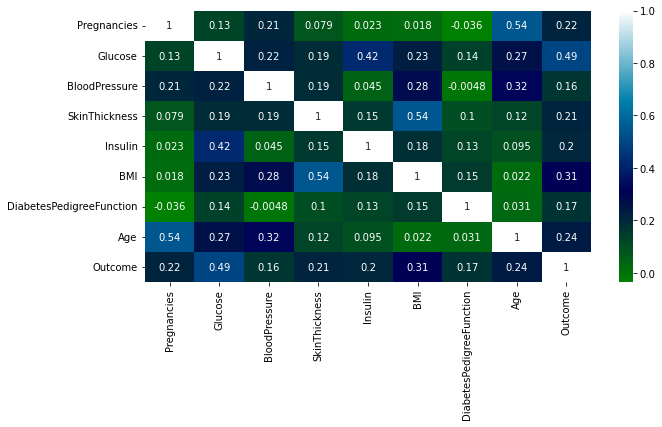

In [30]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'ocean')


In [31]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Data Preprocessing

In [32]:
# Features
x = df.drop(['Outcome'], axis = 1)

# Target
y = df['Outcome']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model_KNN.fit(x_train_scaler,y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
# Accuracy
model_KNN.score(x_test_scaler, y_test)

0.7320261437908496

In [37]:
pred_KNN = model_KNN.predict(x_test_scaler)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, pred_KNN)

array([[84, 18],
       [23, 28]], dtype=int64)

<AxesSubplot:>

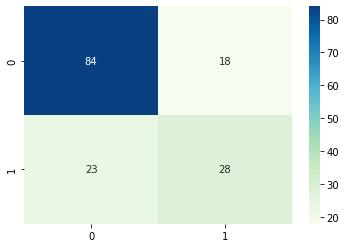

In [40]:
# Diagonals are True Predictions & Non-Diagonals are False
sns.heatmap(confusion_matrix(y_test, pred_KNN), annot = True, fmt = '0.0f', cmap = 'GnBu')

In [41]:
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       102
           1       0.61      0.55      0.58        51

    accuracy                           0.73       153
   macro avg       0.70      0.69      0.69       153
weighted avg       0.73      0.73      0.73       153



In [42]:
from sklearn.metrics import confusion_matrix
TN,FP,FN,TP = confusion_matrix(y_test,pred_KNN).ravel()
print(f'True Positives: {TP}')
print(f'True Positives: {FP}')
print(f'True Positives: {FN}')
print(f'True Positives: {TN}')

True Positives: 28
True Positives: 18
True Positives: 23
True Positives: 84


In [43]:
print("Test Accuracy:",model_KNN.score(x_test_scaler, y_test))

Train Accuracy: 0.8098360655737705
Test Accuracy: 0.7320261437908496


In [44]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred_KNN)
accuracy

0.7320261437908496

In [45]:
from sklearn.metrics import roc_auc_score
KNN_auc_score = roc_auc_score(y_test,pred_KNN)
print(KNN_auc_score)

0.6862745098039216


predict_proba() estimates probability for negetive and positive classes, we need to select for positive class only

In [46]:
pred_KNN = model_KNN.predict_proba(x_test_scaler)
KNN_Probs = pred_KNN[:,1]

In [47]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test,KNN_Probs)

AUC: 0.686


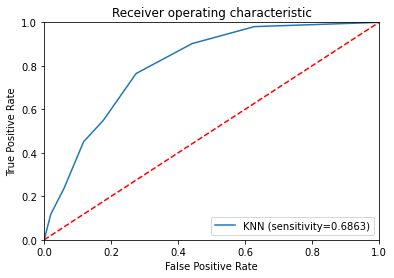

In [48]:
plt.figure()
plt.plot(fpr,tpr,label='KNN (sensitivity=%0.4f)'% KNN_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % KNN_auc_score)
plt.show()

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
# solver = 'lbfgs', C = higher the better, max_iter = 1e7, penalty = 'l2'
logit_model = LogisticRegression(solver='lbfgs', C = 1e4, max_iter=1e3, penalty = 'l2')

In [50]:
logit_model.fit(x_train_scaler, y_train)

LogisticRegression(C=10000.0, max_iter=1000.0)

In [51]:
# Accuracy
logit_model.score(x_test_scaler, y_test)

0.7516339869281046

In [52]:
pred_logit = logit_model.predict(x_test_scaler)

In [53]:
confusion_matrix(y_test, pred_logit)

array([[86, 16],
       [22, 29]], dtype=int64)

In [54]:
print(classification_report(y_test, pred_logit))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.64      0.57      0.60        51

    accuracy                           0.75       153
   macro avg       0.72      0.71      0.71       153
weighted avg       0.75      0.75      0.75       153



In [93]:
print("Test Accuracy:",logit_model.score(x_test_scaler, y_test))

Test Accuracy: 0.7516339869281046


In [56]:
from sklearn.metrics import roc_auc_score
logit_auc_score = roc_auc_score(y_test,pred_logit)
print(logit_auc_score)



0.7058823529411765


In [57]:
pred_logit = logit_model.predict_proba(x_test_scaler)
logit_Probs = pred_logit[:,1]

In [58]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test,logit_Probs)

AUC: 0.706


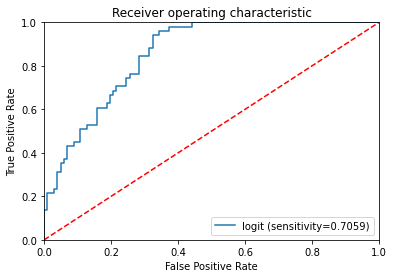

In [59]:
plt.figure()
plt.plot(fpr,tpr,label='logit (sensitivity=%0.4f)'% logit_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % logit_auc_score)
plt.show()

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)

DecisionTreeClassifier()

In [61]:
# Accuracy
DT_model.score(x_test_scaler, y_test)

0.673202614379085

In [62]:
pred_DT = DT_model.predict(x_test_scaler)

In [63]:
confusion_matrix(y_test, pred_DT)

array([[75, 27],
       [23, 28]], dtype=int64)

In [64]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       102
           1       0.51      0.55      0.53        51

    accuracy                           0.67       153
   macro avg       0.64      0.64      0.64       153
weighted avg       0.68      0.67      0.68       153



In [65]:
print("Test Accuracy:",DT_model.score(x_test_scaler, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.673202614379085


In [66]:
from sklearn.metrics import roc_auc_score
DT_auc_score = roc_auc_score(y_test,pred_DT)
print(DT_auc_score)

0.6421568627450981


In [67]:
pred_DT = DT_model.predict_proba(x_test_scaler)
DT_Probs = pred_DT[:,1]

In [68]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test,DT_Probs)

AUC: 0.642


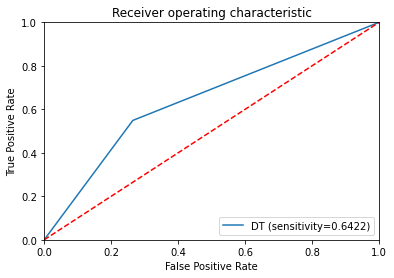

In [69]:
plt.figure()
plt.plot(fpr,tpr,label='DT (sensitivity=%0.4f)'% DT_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % DT_auc_score)
plt.show()

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=200, 
                               criterion='entropy',
                               max_depth=25)
RF_model.fit(x_train_scaler, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=200)

In [71]:
# Accuracy
RF_model.score(x_test_scaler, y_test)

0.7843137254901961

In [72]:
pred_RF = RF_model.predict(x_test_scaler)

In [73]:
confusion_matrix(y_test, pred_RF)

array([[90, 12],
       [21, 30]], dtype=int64)

In [74]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       102
           1       0.71      0.59      0.65        51

    accuracy                           0.78       153
   macro avg       0.76      0.74      0.75       153
weighted avg       0.78      0.78      0.78       153



In [75]:
print("Test Accuracy:",RF_model.score(x_test_scaler, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.7843137254901961


In [76]:
from sklearn.metrics import roc_auc_score
RF_auc_score = roc_auc_score(y_test,pred_RF)
print(RF_auc_score)

0.7352941176470589


In [77]:
pred_RF = RF_model.predict_proba(x_test_scaler)
RF_Probs = pred_RF[:,1]

In [78]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test,RF_Probs)

AUC: 0.735


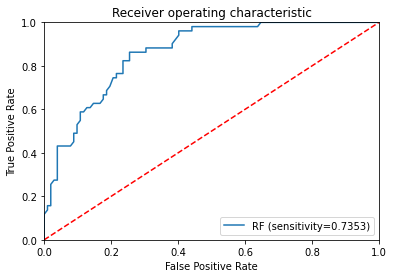

In [79]:
plt.figure()
plt.plot(fpr,tpr,label='RF (sensitivity=%0.4f)'% RF_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % RF_auc_score)
plt.show()

# XG Boosting

In [80]:
from xgboost import XGBClassifier
XG_model  = XGBClassifier()
XG_model.fit(x_train_scaler, y_train)

[16:45:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
# Accuracy
XG_model.score(x_test_scaler, y_test)

0.7647058823529411

In [82]:
pred_XG = XG_model.predict(x_test_scaler)

In [83]:
confusion_matrix(y_test, pred_XG)

array([[87, 15],
       [21, 30]], dtype=int64)

In [84]:
print(classification_report(y_test, pred_XG))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.67      0.59      0.62        51

    accuracy                           0.76       153
   macro avg       0.74      0.72      0.73       153
weighted avg       0.76      0.76      0.76       153



In [85]:
print("Test Accuracy:",XG_model.score(x_test_scaler, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.7647058823529411


In [86]:
from sklearn.metrics import roc_auc_score
XG_auc_score = roc_auc_score(y_test,pred_XG)
print(XG_auc_score)

0.7205882352941176


In [87]:
pred_XG = XG_model.predict_proba(x_test_scaler)
XG_Probs = pred_XG[:,1]

In [88]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test,XG_Probs)

AUC: 0.721


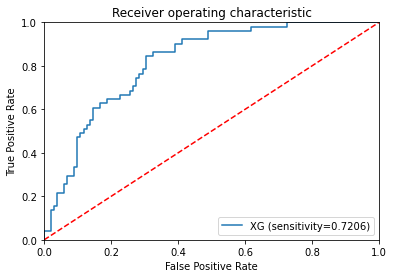

In [89]:
plt.figure()
plt.plot(fpr,tpr,label='XG (sensitivity=%0.4f)'% XG_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('AUC: %.3f' % XG_auc_score)
plt.show()

As per the given readings about Accuracy and AUC of different models. It is clearly shown here that KNN Accuracy and AUC is in the second last position, the lowest scorer is Decision Tree model here.

As per the domain requirement we need to decrease the false negetive rate and increase the true positive rate, so the correct  point should be optimum considering the Random forest as the best model having the most highest accuracy rate of 78 percent and highest auc of 73 percent. Here In this case we need to concern for recall vaue because you need to focus on FNR and TPR.